<a href="https://colab.research.google.com/github/ChristeenTJose/Signature-similarity-search/blob/main/Signature_similarity_search_Knowledge_distillation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def get_embedding_model(classifier_model):
  embedding_model = tf.keras.models.Sequential(
      classifier_model.layers[:-1]
  )
  return embedding_model

os.chdir('/content/drive/MyDrive/Signature similarity search/noise')

noise_dict = {}

for count, filename in enumerate(os.listdir()):
  noise_dict[filename] = {}
  image = tf.keras.preprocessing.image.load_img(filename)
  image_array = tf.keras.preprocessing.image.img_to_array(image)
  noise_dict[filename]['h'] = image_array.shape[0]
  noise_dict[filename]['w'] = image_array.shape[1]
  noise_dict[filename]['c'] = image_array.shape[2]
  noise_dict[filename]['i'] = image_array / 255.0

In [3]:
def add_noise(image_array):
  for i in noise_dict:
    noise_h = noise_dict[i]['h']
    noise_w = noise_dict[i]['w']
    noise_c = noise_dict[i]['c']
    noise_array = noise_dict[i]['i']

    img_h_max = image_array.shape[0]
    img_w_max = image_array.shape[1]

    rand = random.randint(0, 1)
    if rand == 0:
      noise_h_start = 0
      img_h_start = random.randint(0, img_h_max - 1)
    else:
      noise_h_start = random.randint(0, noise_h - 1)
      img_h_start = 0

    rand = random.randint(0, 1)
    if rand == 0:
      noise_w_start = 0
      img_w_start = random.randint(0, img_w_max - 1)
    else:
      noise_w_start = random.randint(0, noise_w - 1)
      img_w_start = 0

    for j in range(min(noise_h - noise_h_start, img_h_max - img_h_start)):
      for k in range(min(noise_w - noise_w_start, img_w_max - img_w_start)):
        for l in range(noise_c):
          image_array[img_h_start + j][img_w_start + k][l] = max(0, image_array[img_h_start + j][img_w_start + k][l] - noise_array[noise_h_start + j][noise_w_start + k][l])

  return image_array

In [4]:
os.chdir('/content/drive/MyDrive/Signature similarity search')

teacher_model_classifier = tf.keras.models.load_model('Model256.keras')
student_model_classifier = tf.keras.models.load_model('Model256-noise.keras')

teacher_model = get_embedding_model(teacher_model_classifier)
student_model = get_embedding_model(student_model_classifier)

teacher_model.summary()
student_model.summary()
print()
print(teacher_model.input_shape)
print(student_model.input_shape)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256)            │     4,195,584 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,424,448 (28.32 MB)

 Trainable params: 4,195,072 (16.00 MB)

 Non-trainable params: 3,229,376 (12.32 MB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256)            │     4,195,584 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,424,448 (28.32 MB)

 Trainable params: 4,195,072 (16.00 MB)

 Non-trainable params: 3,229,376 (12.32 MB)


(None, 128, 128, 3)
(None, 128, 128, 3)


In [5]:
# teacher_output_raw = teacher_model(input_layer)
# teacher_output = tf.keras.layers.Lambda(lambda x: x, name="teacher_output")(teacher_output_raw)

# noisy_layer = tf.keras.layers.Lambda(add_noise, output_shape=(128, 128, 3))(input_layer)
# student_output = student_model(noisy_layer)
'''
Arguments received by Lambda.call():
  • inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)
  • mask=None
  • training=True
'''

# student_output_raw = student_model(input_layer)
# student_output = tf.keras.layers.Lambda(lambda x: x, name="student_output")(student_output_raw)

# distill_model = tf.keras.Model(inputs=input_layer, outputs=[student_output, teacher_output])

# Model has two outputs, use dictionary loss
'''
loss={'student_output': 'mse',
          'teacher_output': lambda y_true, y_pred: tf.constant(0.0)  # Dummy loss
          }
'''
'''
The student model should output only the student prediction.

The teacher model is used to generate targets, not as part of the training model.

Your generator handles the noise and target creation.

This avoids all multi-output loss mapping issues.
'''

'\nThe student model should output only the student prediction.\n\nThe teacher model is used to generate targets, not as part of the training model.\n\nYour generator handles the noise and target creation.\n\nThis avoids all multi-output loss mapping issues.\n'

In [6]:
input_layer = tf.keras.Input(shape=(128, 128, 3))

teacher_model.trainable = False

# teacher_output = teacher_model(input_layer)

student_output = student_model(input_layer)

distill_model = tf.keras.Model(inputs=input_layer, outputs= student_output)

distill_model.compile(
    loss = 'mse',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4, decay=1e-6),
    metrics=['mae',
        tf.keras.metrics.CosineSimilarity(name='cosine_similarity')        ]
)

distill_model.summary()

# accuracy is not a meaningful metric

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256)            │     7,424,448 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,424,448 (28.32 MB)

 Trainable params: 4,195,072 (16.00 MB)

 Non-trainable params: 3,229,376 (12.32 MB)

In [7]:
os.chdir('/content/drive/MyDrive/Datasets/')

organized_dataset_path = os.path.join(os.getcwd(), 'signature-verification-organized')
train_dataset_path = os.path.join(organized_dataset_path, 'Train')
test_dataset_path = os.path.join(organized_dataset_path, 'Test')

train_validation_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    # brightness_range = (0.8, 1.2),
    shear_range = 0.2,
    zoom_range = (0.8, 1.2),
    # channel_shift_range= 20,
    fill_mode = 'nearest',
    #preprocessing_function = add_noise
)

batch_size_train = 32
batch_size_valid = 16

train_data_generator = train_validation_data_generator.flow_from_directory(
    train_dataset_path,
    target_size = (128, 128),
    batch_size = batch_size_train,
    class_mode = 'binary',
    subset = 'training'
)

validation_data_generator = train_validation_data_generator.flow_from_directory(
    train_dataset_path,
    target_size = (128, 128),
    batch_size = batch_size_valid,
    class_mode = 'binary',
    subset = 'validation'
)

Found 1320 images belonging to 2 classes.
Found 329 images belonging to 2 classes.


In [8]:
# inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)

class DistillationDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, base_generator, teacher_model, add_noise_fn):
        self.base_generator = base_generator
        self.teacher_model = teacher_model
        self.add_noise_fn = add_noise_fn

    def __len__(self):
        return len(self.base_generator)

    def __getitem__(self, idx):
        clean_batch = self.base_generator[idx]
        if isinstance(clean_batch, tuple):
            images = clean_batch[0]
        else:
            images = clean_batch

        noisy_batch = np.array([self.add_noise_fn(img.copy()) for img in images])
        teacher_targets = self.teacher_model.predict(images)

        return noisy_batch, teacher_targets

In [9]:
train_distill_gen = DistillationDataGenerator(
    base_generator=train_data_generator,
    teacher_model=teacher_model,
    add_noise_fn=add_noise
)

valid_distill_gen = DistillationDataGenerator(
    base_generator= validation_data_generator,
    teacher_model=teacher_model,
    add_noise_fn=add_noise
)

# distill_model.fit(distill_gen, epochs=10)
history = distill_model.fit(
    train_distill_gen,
    epochs=1000,
    validation_data = valid_distill_gen,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

In [10]:
os.chdir('/content/drive/My Drive/')
distill_model.save('Model256-distilled.keras')

Notes

Starting val_loss at 0.98: The student initially struggled to mimic the teacher’s embeddings on unseen noisy inputs.

Dropping to 0.39 by epoch 45: That’s a significant improvement — the student is now producing embeddings much closer to the teacher’s, even on validation data.

This kind of steady decline in validation loss is exactly what you want in a distillation setup. It means:

Your noise function is realistic but learnable.

Your student architecture has enough capacity.

Your training pipeline is stable and effective.

Loss is decreasing: From 0.55 → 0.41 → 0.35, showing consistent improvement.

Validation loss is tracking well: No major divergence from training loss, which means your student is generalizing, not just memorizing.

You're past the early plateau: Many models flatten out early, but yours is still improving — that’s a good sign.

In [11]:
History = distill_model.history

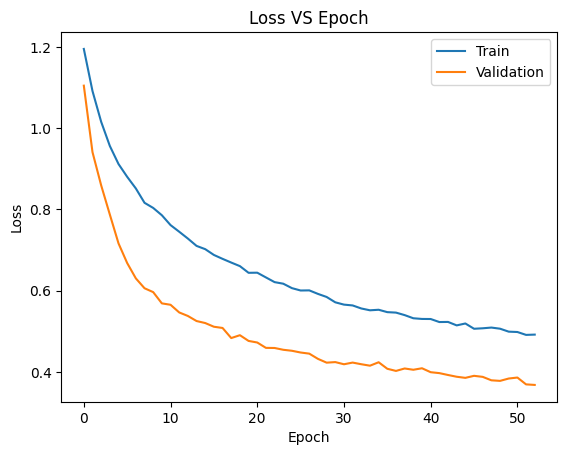

In [12]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

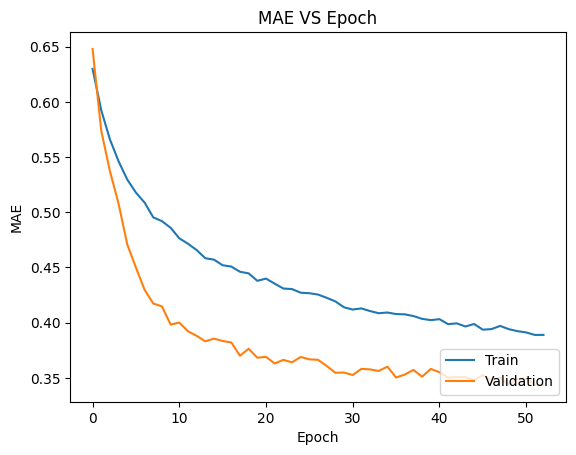

In [13]:
plt.plot(History.history['mae'])
plt.plot(History.history['val_mae'])
plt.title('MAE VS Epoch')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

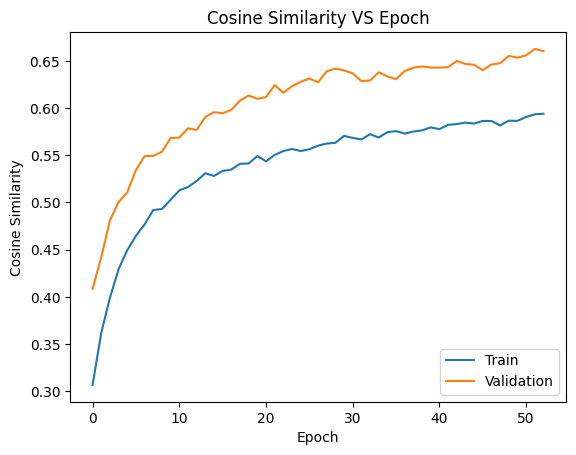

In [14]:
plt.plot(History.history['cosine_similarity'])
plt.plot(History.history['val_cosine_similarity'])
plt.title('Cosine Similarity VS Epoch')
plt.ylabel('Cosine Similarity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [15]:
batch_size_test = 32

test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255).flow_from_directory(test_dataset_path,
                                                                    target_size = (128,128),
                                                                    batch_size = batch_size_test,
                                                                    class_mode = 'binary')

test_distill_gen = DistillationDataGenerator(
    base_generator=test_data_generator,
    teacher_model=teacher_model,
    add_noise_fn=add_noise
)

distill_model.evaluate(test_distill_gen)

test_distill_gen.shuffle = False
test_distill_gen.reset()

y_pred = distill_model.predict(test_distill_gen)
y_pred_labels = (y_pred >= 0.5).astype(int)

y_true = test_distill_gen.classes

cm = confusion_matrix(y_true, y_pred_labels)
print(cm)

cr = classification_report(y_true, y_pred_labels)
print(cr)

Found 500 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 89s 6s/step - cosine_similarity: 0.7167 - loss: 0.4112 - mae: 0.3581


AttributeError: 'DistillationDataGenerator' object has no attribute 'reset'